# Homework 3

## By Vyanna Hill

### Chapter 6

In [1]:
# Dervide from Allen Downey
#Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

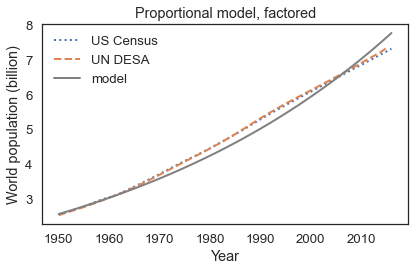

In [2]:
filename = 'World_population_estimates.html'
tables = read_html(filename,header=0,index_col=0,decimal='M')

# below is last chapter's code, derive by allen downey
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
un = table2.un / 1e9
census = table2.census / 1e9
t_0 = get_first_label(census)
t_end = get_last_label(census)
elapsed_time = t_end - t_0

p_0 = get_first_value(census)
p_end = get_last_value(census)
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time
system = System(t_0=t_0,
t_end=t_end,
p_0=p_0,
annual_growth=annual_growth)


def run_simulation1(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
    
results = run_simulation1(system)

def run_simulation2(system):
    """Run a model with proportional birth and death.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    return results

system.death_rate = 0.01
system.birth_rate = 0.027

results = run_simulation2(system)


def update_func1(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths

def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                birth_rate=0.027,
                death_rate=0.01)

results = run_simulation(system, update_func1)
plot_results(census, un, results, 'Proportional model, factored')

Exercise 1:
    What happens if you put parentheses around update_func1?
    Add a print statement at the beginning of update_func1 that prints the values of t and pop, then run run_simulation again  

In [3]:
#If you put parethese around update_Func1, it will throw an error as the object was passed as a string than a function

def update_func1(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    print(pop)
    print(t)
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths
results = run_simulation(system, update_func1)


2.557628654
1950
2.601108341118
1951
2.645327182917006
1952
2.6902977450265952
1953
2.7360328066920476
1954
2.7825453644058125
1955
2.829848635600711
1956
2.8779560624059233
1957
2.926881315466824
1958
2.9766382978297603
1959
3.0272411488928666
1960
3.078704248424045
1961
3.131042220647254
1962
3.184269938398258
1963
3.2384025273510284
1964
3.293455370315996
1965
3.349444111611368
1966
3.406384661508761
1967
3.46429320075441
1968
3.523186185167235
1969
3.583080350315078
1970
3.6439927162704344
1971
3.7059405924470314
1972
3.768941582518631
1973
3.833013589421448
1974
3.8981748204416125
1975
3.9644437923891203
1976
4.031839336859735
1977
4.100380605586351
1978
4.170087075881319
1979
4.240978556171301
1980
4.313075191626214
1981
4.3863974698838595
1982
4.460966226871885
1983
4.536802652728707
1984
4.613928297825096
1985
4.692365078888122
1986
4.77213528522922
1987
4.8532615850781164
1988
4.935767032024445
1989
5.0196750715688605
1990
5.1050095477855315
1991
5.191794710097886
1992
5.28005

,values
1950,2.557629
1951,2.601108
1952,2.645327
1953,2.690298
1954,2.736033
...,...
2012,7.273385
2013,7.397032
2014,7.522782
2015,7.650669


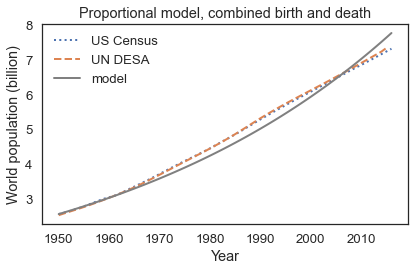

In [4]:
#From chapter 6, by allen downey
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth
system.alpha = system.birth_rate - system.death_rate

results = run_simulation(system, update_func2)
plot_results(census, un, results, 'Proportional model, combined birth and death')

Exercise 2:
     Write an update function that takes pop, t, and system as parameters. The system object, system, should contain two parameters: the growth rate before 1980, alpha1, and the growth rate after 1980, alpha2. It should use t to determine which growth rate to use. Note: Don't forget the return statement.

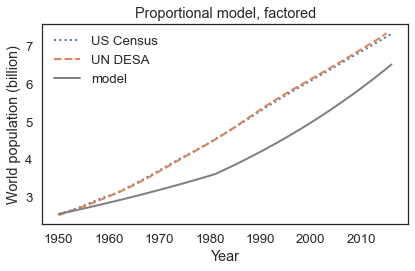

In [5]:
def update_func3(pop, t, system):
    #If the year is greater than 1980, use the growth given above and return the net growth
    if t> 1980:
        net_growth = system.alpha2  * pop
        return pop + net_growth
    else:
    # If the year is before 1980, use the secondary growth rate and return net growth
        net_growth = system.alpha1  * pop
        return pop + net_growth
    
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha2= 0.027-0.01,
                alpha1=0.021-0.0098)

results = run_simulation(system, update_func3)
plot_results(census, un, results, 'Proportional model, factored')


### Chapter 7

In [6]:
#From chapter 7, by allen downey
def update_func_quad(pop, t, system):
    """Compute the population next year with a quadratic model.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)


,values
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Exercise 3:
    Can you find values for the parameters that make the model fit better?

 Yes, but we would need a trail and error system to find out which beta/ aplha values fit the line best. It is also apparent some of these variables might be best fit on certain parts on the graph; seen above the current values seem best fit from early 1980s to mid 1980s. There would need to be a function that changes alpha and beta dependent on the year and population, as these variables do not stay constant throughout the chart 

Exercise 4:
    Write a version of update_func that implements this version of the model. Test it by computing the values of r and K that correspond to alpha=0.025, beta=-0.0018, and confirm that you get the same results.

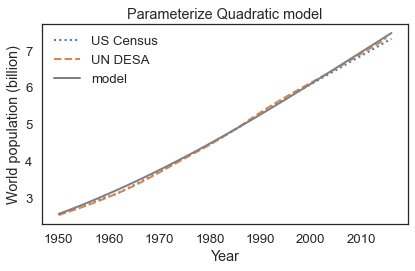

In [7]:
def update_func4(pop, t, system):
    # Following the parameterize forumla, compute for K first. Then, use the new net growth formula
    K=-(system.alpha)/system.beta
    net_growth= (system.alpha*pop)*(1-(pop/K))
    return pop+net_growth

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)
#run using the newest update funnction
results = run_simulation(system, update_func4)
plot_results(census, un, results, 'Parameterize Quadratic model')

#see chart below to document no difference from the orginal quadratic formula